# Parkinson's Disease 
> Parkinson's disease is a progressive nervous system disorder that affects movement. Symptoms start gradually, sometimes starting with a barely noticeable tremor in just one hand. Tremors are common, but the disorder also commonly causes stiffness or slowing of movement

## Proplem Statment
> In this notebook we will try to classifiy the patiente that they have the Parkinson's Disease and create a model to indicate who who have this disease based in his situation and choosing the correct score method. 

## DATA 
> We have 195 rows of data and 24columns which is not that big. 

## Features 
> We have 23 features and on target valus the features has been explained inside the notbook according to its importance 

## Scoring 

> We find the all possibel score for classification proplem and explain it inside the note book 

In [207]:
# import the data 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix




In [14]:
# We donot need drop th name since it is unique
df.read_csv('parkinsons.data.csv')
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [15]:
# lets see if we have missing values 
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

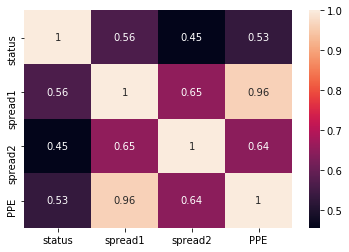

In [44]:
top_features = df.corr().index[abs(df.corr()['status']>0.4)]
sns.heatmap(df[top_features].corr(),annot=True);

* We can see the relation between spread1 and ppe is almost the same. 
* all the above values have posive relation with statues.

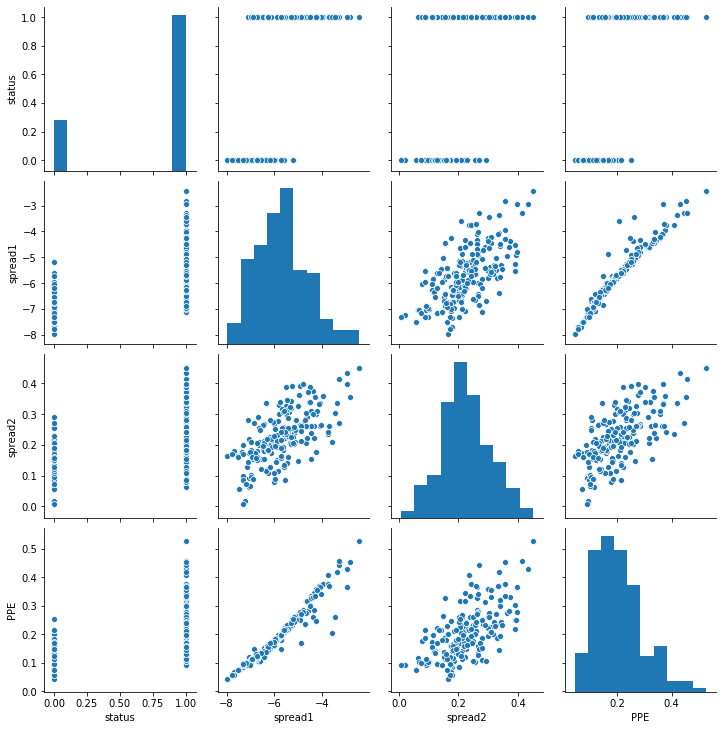

In [46]:
sns.pairplot(df[top_features])

### check outlayes
* Between spread 1 and PPE looks loke there is outlayer after -4 and almost at 0.2 PPE 
* as we can see increeasing these will increase the probaablities of having prkinsons.

In [50]:
df['spread1'].describe()

count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64

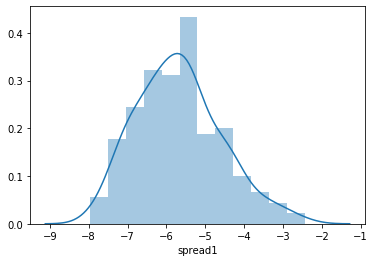

In [51]:
sns.distplot(df['spread1'])

In [63]:
df['spread1'].describe()

count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64

In [64]:
-2.434031+ 1.5*(1)

-0.9340310000000001

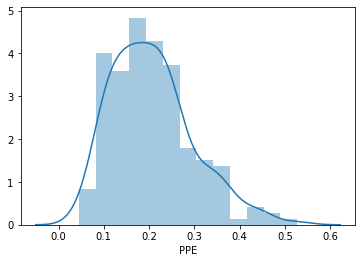

In [53]:
# rigth skewed
sns.distplot(df['PPE'])

In [55]:
# outlayer callculatin
0.25 +1.5*(0.090119)

0.3851785

In [61]:
df[(df['PPE']>0.4)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
17,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.04322,0.02919,20.376,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
102,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
148,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
151,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [74]:
# here is the out layer I am goin too kep it to see the result
df[(df['spread1'] >-4) & (df['PPE']<0.25)]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
155,117.87,127.349,95.654,0.00647,0.00005,0.00356,0.003,0.01067,0.03087,0.276,...,0.04977,0.02631,22.431,1,0.6283,0.652025,-3.583722,0.207914,2.439597,0.206256


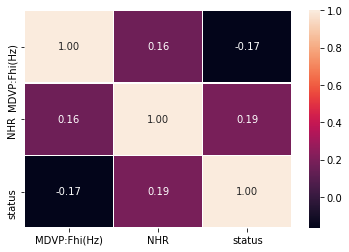

In [103]:
worse_feature = df.corr().index[abs(df.corr()['status'])<0.2]
worse_feature=worse_feature.append(df.corr().index[df.corr().index=='status'])
sns.heatmap(df[worse_feature].corr(),annot=True,fmt='.2f',linewidths=0.4);

### This is not very small corlation so it is no safe to drop them 
> Lets decover more about important features PPE,Spread1,spread2 
* (Spread-1) is a protein that in humans is encoded by the SPRED1 gene located on chromosome 15q13.2 and has seven coding exons.[5]
* A New Measure of PD Dysphonia: Pitch Period Entropy (PPE)

> For the worse features 
* A Harmonicity object represents the degree of acoustic periodicity, also called Harmonics-to-Noise Ratio (HNR). ... A HNR of 0 dB means that there is equal energy in the harmonics and in the noise. Harmonicity can be used as a measure for: The signal-to-noise ratio of anything that generates a periodic signal.
* The Multi-Dimensional Voice Program (MDVP) is a computer program that can calculate as many as 33 acoustic parameters from a voice sample. The MDVP appears to have potential for rapid quantitative assessments of voice in both research and clinical applications.



In [120]:
# Split the data to x,y 
X= df.drop('status',axis=1)
y= df['status']

# Split into test and train data 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 4)


In [129]:
## Modelling 
def show_scores(model):
    
    ytrainpredict = model.predict(x_train)
    ytestpredeict = model.predict(x_test)
    
    scores = {
        'Accuracy_train': accuracy_score(y_train,ytrainpredict),
        'Accuracy_test': accuracy_score(y_test,ytestpredeict),
        'F1_train': f1_score(y_train,ytrainpredict),
        'F1_test': f1_score(y_test,ytestpredeict),
           'recall_train': recall_score(y_train,ytrainpredict),
        'recall_test': recall_score(y_test,ytestpredeict),
           'accuracy_train': accuracy_score(y_train,ytrainpredict),
        'accuracy_test': accuracy_score(y_test,ytestpredeict)
    }
    
    return scores

In [122]:
random = RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
randomScore=show_scores(random)

In [133]:
xGboost = XGBClassifier()
xGboost.fit(x_train,y_train)
xGboostScore=show_scores(xGboost)

In [179]:
scores = xGboostScore,randomScore

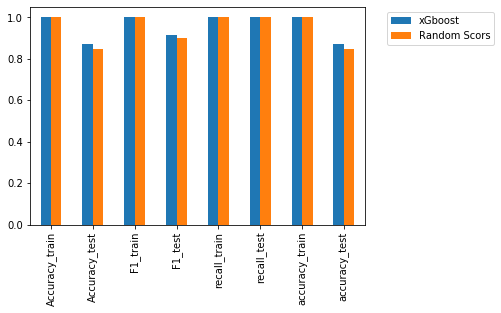

In [190]:
model_compare = pd.DataFrame(scores,index=['xGboost','Random Scors'])
model_compare.T.plot(kind='bar');
plt.legend(bbox_to_anchor=(1.05, 1));


#### using the xGhboost classifier  is better on  the all score.
* What scores is more important in this case

In [193]:
confusion_matrix(y_test,xGboost.predict(x_test))

array([[ 7,  5],
       [ 0, 27]], dtype=int64)

In [195]:
y_test.value_counts()

1    27
0    12
Name: status, dtype: int64

Text(33.0, 0.5, 'Actual')

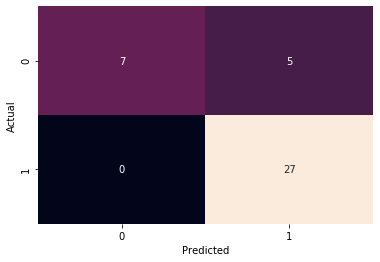

In [205]:

sns.heatmap(confusion_matrix(y_test,xGboost.predict(x_test)),annot=True,cbar=False,fmt='.5g');
plt.xlabel('Predicted')
plt.ylabel('Actual')


## Score Choosing 

* In this proplem the accuracy is not the percect choice because ther is 5 persons consider they are negative and they are not also we do not care about the recall for tha same reason. 

* We care about the f1 and the presecain since it has try to reduce the number of the false positve 
 > F1 Score. The F1 Score is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. Put another way, the F1 score conveys the balance between the precision and the recall


### Conclusion 
> This small project to show the classificatin of Parkinson's disease and we obtained the the feture importance after checking if there was a missing values or not. Then, We had see some relations between the imprtant fetues spreaad1 and PPE and it have linear relatin . Also we found outlair bu it appears its not affecting the result.Lastly we compare between the random forest and XGB and it appears the XGB is better.
